This code demonstrates how to use an LSTM (Long Short-Term Memory) network to predict the next value in a sine wave sequence. It applies sequence modeling, where the model learns patterns in the data and predicts future values.

NumPy: For numerical computations, such as creating and reshaping arrays.
Matplotlib: For visualizing the sine wave and model predictions.
TensorFlow/Keras:

    Sequential: A linear stack of layers for building the neural network.
    SimpleRNN, LSTM: RNN layers, with LSTM used here to model sequences.
    Dense: Fully connected layer for output.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense


2024-12-13 12:53:48.352880: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-13 12:53:48.374304: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-13 12:53:48.399698: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-13 12:53:48.407808: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-13 12:53:48.427702: I tensorflow/core/platform/cpu_feature_guar

Generating a Sine Wave Dataset
time_steps: Total number of data points in the sine wave.
sequence_length: Number of past values used to predict the next value.
    np.linspace(0, 40 * np.pi, time_steps) creates time_steps equally spaced points between 0 and 40π40π.
    np.sin generates a sine wave from these points.

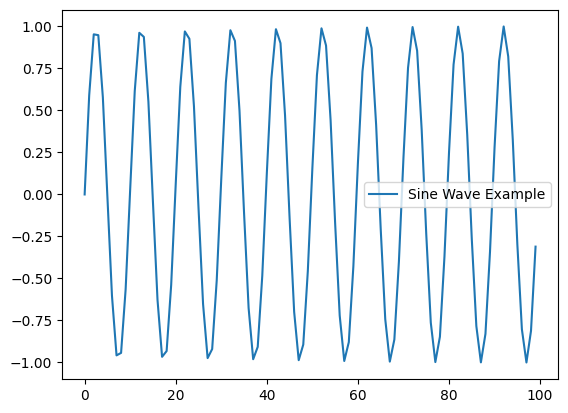

In [2]:
time_steps = 200
sequence_length = 20
data = np.sin(np.linspace(0, 40 * np.pi, time_steps))
plt.plot(data[:100], label="Sine Wave Example")
plt.legend()
plt.show()


Input Sequences (X): Each sequence contains sequence_length consecutive values of the sine wave.
Labels (y): The value immediately following each sequence (the next value in the sine wave).
Reshapes X to a 3D array:

    Dimensions: (num_samples, sequence_length, 1)
    Each sequence has sequence_length values, and the third dimension represents one feature.

In [3]:
X = []
y = []
for i in range(len(data) - sequence_length):
    X.append(data[i:i + sequence_length])
    y.append(data[i + sequence_length])
X = np.array(X).reshape(-1, sequence_length, 1)
y = np.array(y)

In [4]:
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


Sequential Model: Layers are added linearly.
LSTM Layer:

    50: Number of units (neurons).
    activation='tanh': Activation function for the LSTM gates.
    input_shape=(sequence_length, 1): Shape of the input sequences.

Dense Layer:

    Single neuron for predicting the next value in the sequence.

In [5]:
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(sequence_length, 1)),
    Dense(1)  # Output layer
])
model.compile(optimizer='adam', loss='mse')


/home/akshita/miniconda3/envs/ML/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.4926 - val_loss: 0.4345
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4339 - val_loss: 0.3667
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4036 - val_loss: 0.2837
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2652 - val_loss: 0.1832
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1448 - val_loss: 0.0592
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0307 - val_loss: 0.0173
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0158 - val_loss: 9.4299e-04
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020 - val_loss: 0.0043
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024 - val_loss: 9.7852e-05
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.0317e-04 - val_loss: 7.0157e-04
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.2296e-04 - val_loss: 1.6187e-04
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.6

In [7]:
predictions = model.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step


    Ensures that y_test and predictions have the same length for comparison.

In [9]:
min_length = min(len(y_test), len(predictions))
y_test = y_test[:min_length]
predictions = predictions[:min_length]


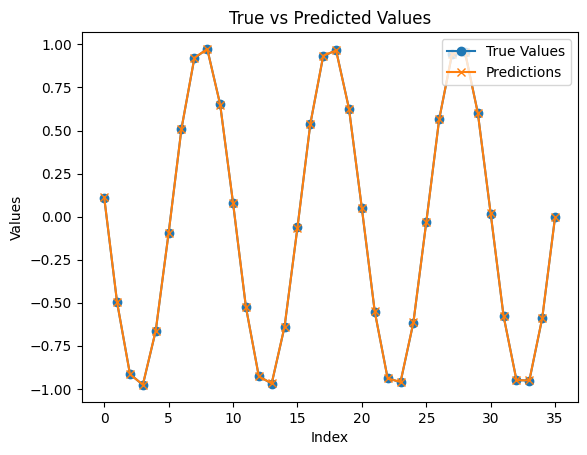

In [10]:
plt.plot(range(len(y_test)), y_test, label='True Values', marker='o')
plt.plot(range(len(predictions)), predictions, label='Predictions', marker='x')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.show()